In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, models,datasets
from torchvision.utils import make_grid

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10), 
    transforms.RandomHorizontalFlip(),  
    transforms.Resize(224),             
    transforms.CenterCrop(224),         
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [13]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [14]:
root = r'C:\Users\arunm\OneDrive\Documents\cat dog pandas'



In [15]:
train_data = datasets.ImageFolder(os.path.join(root, 'Train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'Test'), transform=test_transform)

In [16]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['cat', 'dog', 'panda']
Training images available: 2100
Testing images available:  600


In [18]:
GoogLeNetmodel = models.googlenet(pretrained=True)


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\arunm/.cache\torch\hub\checkpoints\googlenet-1378be20.pth
100.0%


In [19]:
GoogLeNetmodel

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [20]:
for param in GoogLeNetmodel.parameters():
    param.requires_grad = False

In [21]:


num_features = GoogLeNetmodel.fc.in_features

GoogLeNetmodel.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 3) 
)



In [22]:
GoogLeNetmodel

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [23]:
for param in GoogLeNetmodel.parameters():
    print(param.numel())



9408
64
64
4096
64
64
110592
192
192
12288
64
64
18432
96
96
110592
128
128
3072
16
16
4608
32
32
6144
32
32
32768
128
128
32768
128
128
221184
192
192
8192
32
32
27648
96
96
16384
64
64
92160
192
192
46080
96
96
179712
208
208
7680
16
16
6912
48
48
30720
64
64
81920
160
160
57344
112
112
225792
224
224
12288
24
24
13824
64
64
32768
64
64
65536
128
128
65536
128
128
294912
256
256
12288
24
24
13824
64
64
32768
64
64
57344
112
112
73728
144
144
373248
288
288
16384
32
32
18432
64
64
32768
64
64
135168
256
256
84480
160
160
460800
320
320
16896
32
32
36864
128
128
67584
128
128
212992
256
256
133120
160
160
460800
320
320
26624
32
32
36864
128
128
106496
128
128
319488
384
384
159744
192
192
663552
384
384
39936
48
48
55296
128
128
106496
128
128
262144
256
768
3


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(GoogLeNetmodel.fc.parameters(), lr=0.001)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

ResNet18model = GoogLeNetmodel.to(device)

Using device: cpu


In [26]:
import time
import torch

epochs = 3
max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

start_time = time.time()

for i in range(epochs):
    GoogLeNetmodel.train()
    trn_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break

        X_train, y_train = X_train.to(device), y_train.to(device)

        y_pred = GoogLeNetmodel(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        if (b+1) % 200 == 0:
            print(f'epoch: {i+1:2}  batch: {b+1:4} [{(b+1)*10:6}/2100]  '
                  f'loss: {loss.item():10.8f}  '
                  f'accuracy: {trn_corr.item()*100/((b+1)*train_loader.batch_size):7.3f}%')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    GoogLeNetmodel.eval()
    tst_corr = 0

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            X_test, y_test = X_test.to(device), y_test.to(device)

            y_val = GoogLeNetmodel(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

        loss_val = criterion(y_val, y_test)
        test_losses.append(loss_val.item())
        test_correct.append(tst_corr.item())

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

epoch:  1  batch:  200 [  2000/2100]  loss: 0.11340822  accuracy:  86.000%
epoch:  2  batch:  200 [  2000/2100]  loss: 0.01299595  accuracy:  91.500%
epoch:  3  batch:  200 [  2000/2100]  loss: 0.01514696  accuracy:  92.000%

Duration: 414 seconds


In [27]:
best_val_acc = 0.0

val_acc = tst_corr.item() / len(test_data)
if val_acc > best_val_acc:
    best_val_acc = val_acc
    torch.save(GoogLeNetmodel.state_dict(), 'best_resnet18_model.pth')
    print(f"Saved best model at epoch {i+1} with val_acc = {val_acc*100:.2f}%")

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Saved best model at epoch 3 with val_acc = 98.00%

Duration: 816 seconds


In [28]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1]*100/len(test_data):.3f}%')

[592, 591, 588]
Test accuracy: 98.000%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565..2.64].


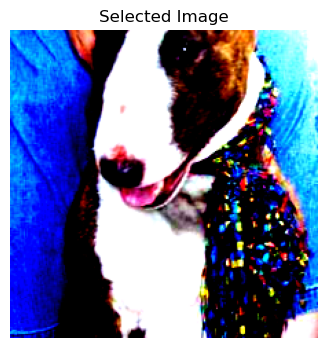

True class: dog
Predicted class: dog


In [29]:
image_index = 250
img, label = test_data[image_index]

plt.figure(figsize=(4, 4))
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.title("Selected Image")
plt.show()

GoogLeNetmodel.eval()
with torch.no_grad():
    img_input = img.unsqueeze(0).to(device)
    pred = GoogLeNetmodel(img_input).argmax(dim=1)

predicted_class = class_names[pred.item()]
true_class = class_names[label]

print(f"True class: {true_class}")
print(f"Predicted class: {predicted_class}")

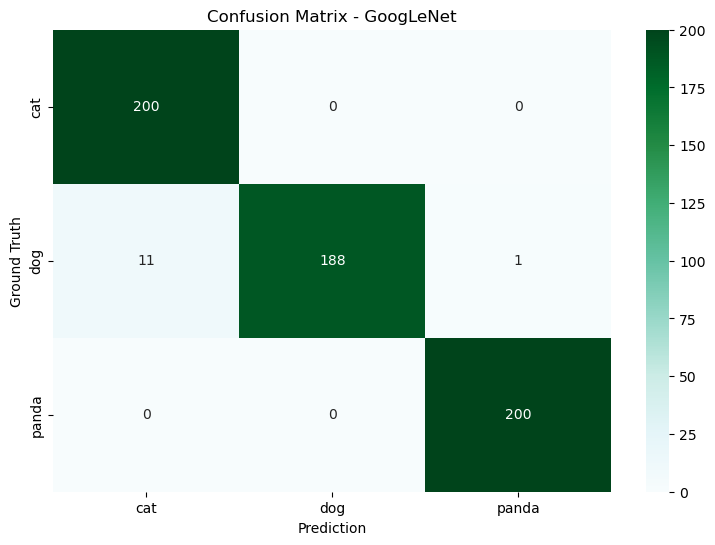

In [31]:
from sklearn.metrics import confusion_matrix

test_load_all = DataLoader(test_data, batch_size=20, shuffle=False)

all_preds = []
all_labels = []

GoogLeNetmodel.eval()
with torch.no_grad():
    for X_test, y_test in test_load_all:
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_val = GoogLeNetmodel(X_test)
        predicted = torch.max(y_val, 1)[1]

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_test.cpu().numpy())

import seaborn as sns
arr = confusion_matrix(all_labels, all_preds)

df_cm = pd.DataFrame(arr, index=class_names, columns=class_names)

plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix - GoogLeNet")
plt.show()